# Gathering Data

In [112]:
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Read data from local csv file

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.expanded_urls[1]

'https://twitter.com/dog_rates/status/892177421306343426/photo/1'

In [4]:
twitter_archive.shape

(2356, 17)

In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 3. Download data from url

In [6]:
folder_name = 'twitter_image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [8]:
image_predictions = pd.read_csv('twitter_image_prediction/image-predictions.tsv', sep = '\t')

In [9]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Query information such as reweets times, likes via tweepy API.

In [ ]:
import tweepy
import json
import time



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [ ]:
tweet_data1 = api.get_status(666020888022790149, tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
tweet_data1

In [ ]:
start = time.time()
tweet_ids = twitter_archive.tweet_id
tweet_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
    try: 
        tweet_data.append(api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True))
        tweet_success.append(tweet_id)
    except:
        tweet_failure.append(tweet_id)
        print(tweet_id)
        
end = time.time()
print(end - start)

In [ ]:
len(tweet_failure)

In [ ]:
len(tweet_success)

In [ ]:
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [ ]:
tweet_df = pd.read_json('tweet_json.txt')

In [ ]:
tweet_df['tweet_id']= tweet_success

In [ ]:
tweet_df= tweet_df[['tweet_id','favorite_count','retweet_count']]

In [ ]:
tweet_df.head()

In [ ]:
tweet_df.to_pickle('tweet_df.pkl')

In [10]:
tweet_df = pd.read_pickle('tweet_df.pkl')

# Assessing Data

In [11]:
# Display twitter_archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
sum(twitter_archive.duplicated())

0

In [14]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

`twitter_archive` columns:

- **Completeness:** 
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls have missing data on those columns.
- **Validity:** 
    - Some rating numbers in rating_number column are too large comparing to other rating number, such as 666; Some rating number is less than 10 which is not compliant to the rule.
    - Some denominator have invalid values.
- **Accuracy:**
    - retweeted_status_timestamp, timestamp should be datetime instead of object (string).
    - Name column have invalid names i.e 'None', 'a', 'an' and less than 3 characters.


In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
sum(image_predictions.jpg_url.duplicated())

66

In [19]:
print(image_predictions.p1_dog.value_counts())
print(image_predictions.p2_dog.value_counts())
print(image_predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [20]:
tweet_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36321,7729
1,892177421306343426,31311,5723
2,891815181378084864,23583,3786
3,891689557279858688,39633,7894
4,891327558926688256,37828,8514
...,...,...,...
2326,666049248165822465,96,40
2327,666044226329800704,272,132
2328,666033412701032449,112,41
2329,666029285002620928,121,42


In [21]:
sum(tweet_df.tweet_id.duplicated())

0

### Qulity Issues
`twitter_archive` columns:

- **Completeness:** 
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls have missing data on those columns.
- **Validity:** 
    - Some rating numbers in rating_number column are too large comparing to other rating number, such as 666; Some rating number is less than 10 which is not compliant to the rule.
    - Some denominator have invalid values.
- **Accuracy:**
    - retweeted_status_timestamp, timestamp should be datetime instead of object (string).
    - Name column have invalid names i.e 'None', 'a', 'an' and less than 3 characters.\
 
`image_predictions` columns:

- **Validity:**
    - Data in p1, p2, p3 have invalid infomation such as orange, bagel, and banana.
    - some tweets_ids have the same jpg_url
- **Consistency:** 
    - Some breeds are listed in lowercase, while sometimes it is written in Sentence case.
- **Completeness**
    - Missing values from images dataset, 2075 rows instead of 2356 rows in twitter_archive dataset.
    
`tweet_df` columns:
- **Completeness**
    - Missing some data, 2331 rows instead of 2356 rows.

### Tidiness Issues

- **twitter_archive:**
    - dogoo, floofer, pupper, puppo all related to the same variables.

- **image_predictions & tweet_df:**
    - Those two data sets are part of the same obervaional unit as the dataset in twitter_archive. Should be constructed in one table.

# Clean Data

In [22]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()
tweet_df_clean = tweet_df.copy()

##### Define
- 1. Concatenate tweet_df and image_prediction to twitter_archive

##### Code

In [23]:
# Check how many different twitter_id
twitter_archive_clean.shape

(2356, 17)

In [24]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [25]:
sum(twitter_archive_clean.tweet_id.duplicated())

0

In [26]:
image_predictions_clean.shape

(2075, 12)

In [27]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
sum(image_predictions_clean.tweet_id.duplicated())

0

In [29]:
tweet_df_clean.shape

(2331, 3)

In [30]:
sum(tweet_df_clean.tweet_id.duplicated())

0

In [31]:
dog_rate = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id')

In [32]:
dog_rate = pd.merge(dog_rate, tweet_df_clean, on = 'tweet_id')

##### Test

In [33]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

#### Define

- 2. Melt the 'doggo', 'loofer', 'pupper' and 'puppo' into one column called dog_breed.

#### Code

In [34]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

In [36]:
dog_rate.loc[(dog_rate[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1].iloc[1]

tweet_id                                                     854010172552949760
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-04-17 16:34:26 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          At first I thought this was a shy doggo, but i...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/854010172...
rating_numerator                                                             11
rating_denominator                                                           10
name                                    

In [44]:
stages=['doggo','floofer', 'pupper', 'puppo']
for _ in stages:
    dog_rate[_][dog_rate[_]=='None']=np.nan

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
dog_rate['dog_stage'] = dog_rate['doggo'].fillna('')+ dog_rate['floofer'].fillna('')+dog_rate['pupper'].fillna('')+dog_rate['puppo'].fillna('')


In [63]:
dog_rate['dog_stage'].value_counts()

                1741
pupper           210
doggo             65
puppo             23
doggopupper       11
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [64]:
stages = ['doggopupper', 'doggofloofer', 'doggopuppo']
dog_rate['dog_stage'][dog_rate['dog_stage'].isin(stages)] = 'multiple'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
dog_rate['dog_stage'].value_counts()

            1741
pupper       210
doggo         65
puppo         23
multiple      13
floofer        7
Name: dog_stage, dtype: int64

In [68]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 31 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         78 non-null object
floofer                       8 non-null object
pupper                        221 non-null object
puppo                         24 non-null object
jpg_url                       2059 non-null

In [71]:
dog_rate =dog_rate.drop(['doggo','floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [72]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 27 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non-null object
p1_conf                       2059 non-null float64
p1_dog                        2059 

In [73]:
dog_rate.dog_stage.value_counts()

            1741
pupper       210
doggo         65
puppo         23
multiple      13
floofer        7
Name: dog_stage, dtype: int64

#### Define

- 3.Delete the columns and rows that is invalid or not needed anymore.

In [74]:
dog_rate.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,36321,7729,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31311,5723,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,23583,3786,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39633,7894,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37828,8514,


In [75]:
# Keep the rows
dog_rate = dog_rate[np.isnan(dog_rate.retweeted_status_id)]

In [76]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 27 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
jpg_url                       1987 non-null object
img_num                       1987 non-null int64
p1                            1987 non-null object
p1_conf                       1987 non-null float64
p1_dog                        1987 non

In [77]:
# Drop the following columns
dog_rate = dog_rate.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [78]:
dog_rate.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,36321,7729,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31311,5723,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,23583,3786,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39633,7894,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37828,8514,


In [79]:
# Drop columns that is no longer needed
dog_rate.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)

#### Test

In [80]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 20 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
jpg_url               1987 non-null object
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
dog_stage             1987 non-null object
dtypes: bool(3), float64(3), int64(5), ob

#### Define

- 4. Change tweet_id from an integer to a string.
- 5. Change Timestamps to datetime format.

In [81]:
dog_rate.tweet_id = dog_rate.tweet_id.astype(str)

In [82]:
dog_rate['timestamp'] = dog_rate['timestamp'].str.slice(start=0, stop=-6)

In [83]:
dog_rate.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2054    2015-11-16 00:24:50
2055    2015-11-16 00:04:52
2056    2015-11-15 23:21:54
2057    2015-11-15 23:05:30
2058    2015-11-15 22:32:08
Name: timestamp, Length: 1987, dtype: object

In [84]:
dog_rate.timestamp = pd.to_datetime(dog_rate.timestamp)

#### Test

In [85]:
dog_rate.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36321,7729,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31311,5723,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23583,3786,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39633,7894,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37828,8514,


#### Define

- 6. Remove or modify the observation with invalid denominator.
- 7. Correct naming issues.

#### Code

In [86]:
dog_rate.rating_denominator.value_counts()

10     1969
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [87]:
dog_rate = dog_rate[dog_rate.rating_denominator == 10]

In [88]:
dog_rate.name.value_counts()

None       534
a           54
Cooper      10
Charlie     10
Oliver      10
          ... 
Goliath      1
O            1
Kramer       1
Ralphie      1
Asher        1
Name: name, Length: 931, dtype: int64

In [89]:
dog_rate.name = dog_rate.name.str.replace('^[a-z]+','None')

#### Test

In [90]:
dog_rate.rating_denominator.value_counts()

10    1969
Name: rating_denominator, dtype: int64

In [91]:
dog_rate.name.sample(5)

143       Rosie
514        None
653     Jackson
748        Milo
1256       None
Name: name, dtype: object

#### Define

- 8. Get rid of image prediction columns.

In [92]:
# We will store the fisrt true algorithm with it's level of confidence
prediction_algorithm = []
confidence_level = []

# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

dog_rate.apply(get_prediction_confidence, axis=1)
dog_rate['prediction_algorithm'] = prediction_algorithm
dog_rate['confidence_level'] = confidence_level

In [93]:
list(dog_rate)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [94]:
dog_rate = dog_rate.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis = 1)

#### Test

In [95]:
dog_rate.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage,prediction_algorithm,confidence_level
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,36321,7729,,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,31311,5723,,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,23583,3786,,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,39633,7894,,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,37828,8514,,basset,0.555712


In [96]:
dog_rate.prediction_algorithm.value_counts()

NaN                   307
golden_retriever      154
Labrador_retriever    103
Pembroke               95
Chihuahua              90
                     ... 
clumber                 1
standard_schnauzer      1
EntleBucher             1
Japanese_spaniel        1
Scotch_terrier          1
Name: prediction_algorithm, Length: 114, dtype: int64

#### Define

- 9. Fix rating numerator and denominators that are invalid or incorrect values.

In [97]:
# View all occurences where there are more than one #/# in 'text' column
dog_rate_fix = dog_rate[dog_rate.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text
dog_rate_fix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


605     "Yep... just as I suspected. You're not flossi...
812     This is Bookstore and Seaweed. Bookstore is ti...
1004    Meet Travis and Flurp. Travis is pretty chill ...
1126    This is Socks. That water pup w the super legs...
1216    This may be the greatest video I've ever been ...
1221    Meet Oliviér. He takes killer selfies. Has a d...
1256    When bae says they can't go out but you see th...
1271    This is Eriq. His friend just reminded him of ...
1282    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1513    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1547    These two pups just met and have instantly bon...
1609    Meet Rufio. He is unaware of the pink legless ...
1613    Two gorgeous dogs here. Little waddling dog is...
1678    Meet Eve. She's a raging alcoholic 8/10 (would...
1718    10/10 for dog. 7/10 for cat. 12/10 for human. ...
1771    Meet Holly. She's trying to teach small human-...
1820    Meet Hank and Sully. Hank is very proud of the...
1883    Here w

In [98]:
import re
for entry in dog_rate_fix:
    mask = dog_rate.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    dog_rate.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    dog_rate.loc[mask, column_name2] = 10

#### Test

In [99]:
dog_rate[dog_rate.text.isin(dog_rate_fix)]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage,prediction_algorithm,confidence_level
605,777684233540206592,2016-09-19 01:42:24,"""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,11,10,None,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,11435,2984,,cocker_spaniel,0.253442
812,747600769478692864,2016-06-28 01:21:27,This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,7,10,Bookstore,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,2343,555,,Chesapeake_Bay_retriever,0.804363
1004,714258258790387713,2016-03-28 01:10:13,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,3029,714,,collie,0.176758
1126,703356393781329922,2016-02-26 23:10:06,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1918,383,,Border_collie,0.894842
1216,695064344191721472,2016-02-04 02:00:27,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/69506...,1606,589,,NaN,0.000000
1221,694352839993344000,2016-02-02 02:53:12,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2041,615,,Australian_terrier,0.407886
1256,691483041324204033,2016-01-25 04:49:38,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,2394,563,,bloodhound,0.886232
1271,690400367696297985,2016-01-22 05:07:29,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,1893,452,,Pembroke,0.426459
1282,689835978131935233,2016-01-20 15:44:48,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,2172,743,,collie,0.600186
1513,677314812125323265,2015-12-17 02:30:09,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,1622,524,,Blenheim_spaniel,0.924127


#### Define

- 10. Fix rating numerator that have decimals.

In [100]:
# View tweets with decimals in rating in 'text' column
dog_rate[dog_rate.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage,prediction_algorithm,confidence_level
40,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,43110,9038,,golden_retriever,0.943082
548,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,18663,6254,,Pomeranian,0.467321
603,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,6668,1647,pupper,clumber,0.946718
1438,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1717,482,,kuvasz,0.438627


In [101]:
dog_rate.loc[(dog_rate['tweet_id'] == 883482846933004288) & (dog_rate['rating_numerator'] == 5), ['rating_numerator']] = 13.5
dog_rate.loc[(dog_rate['tweet_id'] == 786709082849828864) & (dog_rate['rating_numerator'] == 75), ['rating_numerator']] = 9.75
dog_rate.loc[(dog_rate['tweet_id'] == 778027034220126208) & (dog_rate['rating_numerator'] == 27), ['rating_numerator']] = 11.27
dog_rate.loc[(dog_rate['tweet_id'] == 680494726643068929) & (dog_rate['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#### Test

In [102]:
dog_rate[dog_rate.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage,prediction_algorithm,confidence_level
40,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,43110,9038,,golden_retriever,0.943082
548,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,18663,6254,,Pomeranian,0.467321
603,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,6668,1647,pupper,clumber,0.946718
1438,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1717,482,,kuvasz,0.438627


#### Define

- 11. Change datatypes.

In [103]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2058
Data columns (total 13 columns):
tweet_id                1969 non-null object
timestamp               1969 non-null datetime64[ns]
text                    1969 non-null object
expanded_urls           1969 non-null object
rating_numerator        1969 non-null object
rating_denominator      1969 non-null int64
name                    1969 non-null object
jpg_url                 1969 non-null object
favorite_count          1969 non-null int64
retweet_count           1969 non-null int64
dog_stage               1969 non-null object
prediction_algorithm    1969 non-null object
confidence_level        1969 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 215.4+ KB


In [104]:
dog_rate['tweet_id'] = dog_rate['tweet_id'].astype(str)
dog_rate['favorite_count'] = dog_rate['favorite_count'].astype(int)
dog_rate['retweet_count'] = dog_rate['retweet_count'].astype(int)
dog_rate['dog_stage'] = dog_rate['dog_stage'].astype('category')
dog_rate['rating_numerator'] = dog_rate['rating_numerator'].astype(float)
dog_rate['rating_denominator'] = dog_rate['rating_denominator'].astype(float)

#### Test

In [105]:
dog_rate.dtypes

tweet_id                        object
timestamp               datetime64[ns]
text                            object
expanded_urls                   object
rating_numerator               float64
rating_denominator             float64
name                            object
jpg_url                         object
favorite_count                   int64
retweet_count                    int64
dog_stage                     category
prediction_algorithm            object
confidence_level               float64
dtype: object

#### Store

In [106]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2058
Data columns (total 13 columns):
tweet_id                1969 non-null object
timestamp               1969 non-null datetime64[ns]
text                    1969 non-null object
expanded_urls           1969 non-null object
rating_numerator        1969 non-null float64
rating_denominator      1969 non-null float64
name                    1969 non-null object
jpg_url                 1969 non-null object
favorite_count          1969 non-null int64
retweet_count           1969 non-null int64
dog_stage               1969 non-null category
prediction_algorithm    1969 non-null object
confidence_level        1969 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 202.1+ KB


In [107]:
dog_rate.to_csv('twitter_archive_master.csv',encoding = 'utf-8', index=False)

In [108]:
dog_rate = pd.read_csv('twitter_archive_master.csv')

In [109]:
dog_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
tweet_id                1969 non-null int64
timestamp               1969 non-null object
text                    1969 non-null object
expanded_urls           1969 non-null object
rating_numerator        1969 non-null float64
rating_denominator      1969 non-null float64
name                    1969 non-null object
jpg_url                 1969 non-null object
favorite_count          1969 non-null int64
retweet_count           1969 non-null int64
dog_stage               305 non-null object
prediction_algorithm    1662 non-null object
confidence_level        1969 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 200.1+ KB


# Analyze and Visualize

#### Plot the correlation map to see the relationship between variables

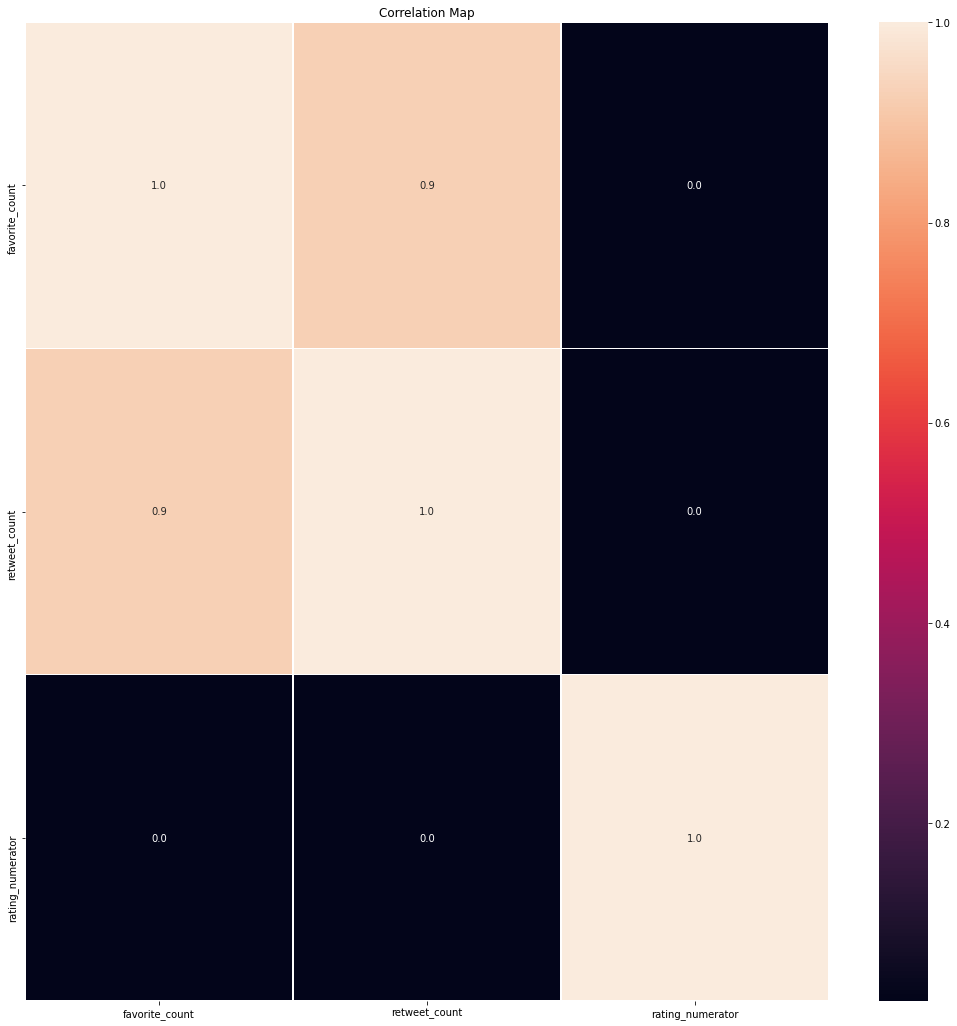

In [114]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dog_rate[['favorite_count', 'retweet_count','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map');

- The only strong relationship here is between retweet_count and favorate_count. This means the more people discuss this dog, the dog is more popular.
- This table does not show that ratint_numerator have a straight relationship with other two variables. 

#### Retweet Counts and Favorates Counts

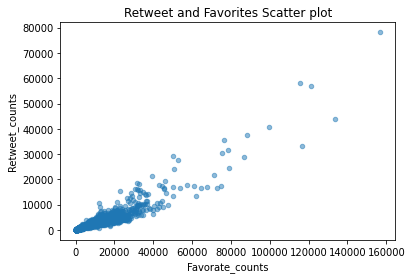

In [117]:
dog_rate.plot(kind='scatter',x = 'favorite_count', y= 'retweet_count',alpha = 0.5)
plt.xlabel('Favorate_counts');
plt.ylabel('Retweet_counts');
plt.title('Retweet and Favorites Scatter plot');

- As the plot shows that the retweet counts has great correlationship with favorite counts.

#### Dog Rating Activity over the time

In [119]:
dog_rate.timestamp = pd.to_datetime(dog_rate.timestamp)
monthly_tweets = dog_rate.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()

,timestamp,tweet_id
0,2015-11-30,295
1,2015-12-31,364
2,2016-01-31,166
3,2016-02-29,109
4,2016-03-31,117


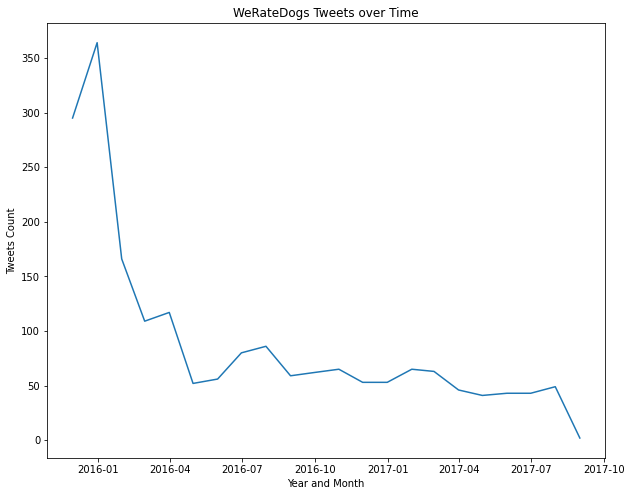

In [120]:
# plotting time vs. tweets
plt.figure(figsize = (10,8))
plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')
plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

- From the plot, we can see that on late 2015 to early 2016, WeRateDogs has a spike activity then decreases from then.

#### Visualize the most popular dog breed

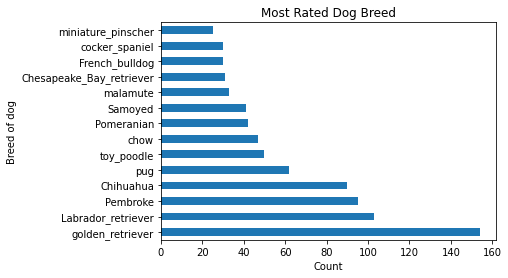

In [122]:
dog_breed = dog_rate.groupby('prediction_algorithm').filter(lambda x: len(x) >= 25)
dog_breed['prediction_algorithm'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

- The most popular dog breed is golder retriever, followed by labrador retriever in the second place.

#### Visualize the dog stage

(-1.2887877067574471, 1.236187684500461, -1.22859557858243, 1.2101818882398883)

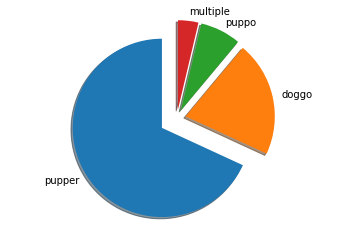

In [124]:
dog_stage_count = list(dog_rate[dog_rate['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = dog_rate[dog_rate['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

-  Pupper is the most owned dog showed in WeRateDog.